# Исследование объявлений о продаже квартир

В распоряжении архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Изучение данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('real_estate_data.csv', sep='\t')

Взглянем на первые 5 строк таблицы, чтобы ознакомиться с данными.

In [2]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Также рассмотрим общую информацию о датафрейме: количество заполненных значений по столбцам и типы данных в них.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Также посмотрим на описание числовых столбцов и построим гистограммы по всем столбцам таблицы.

In [4]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


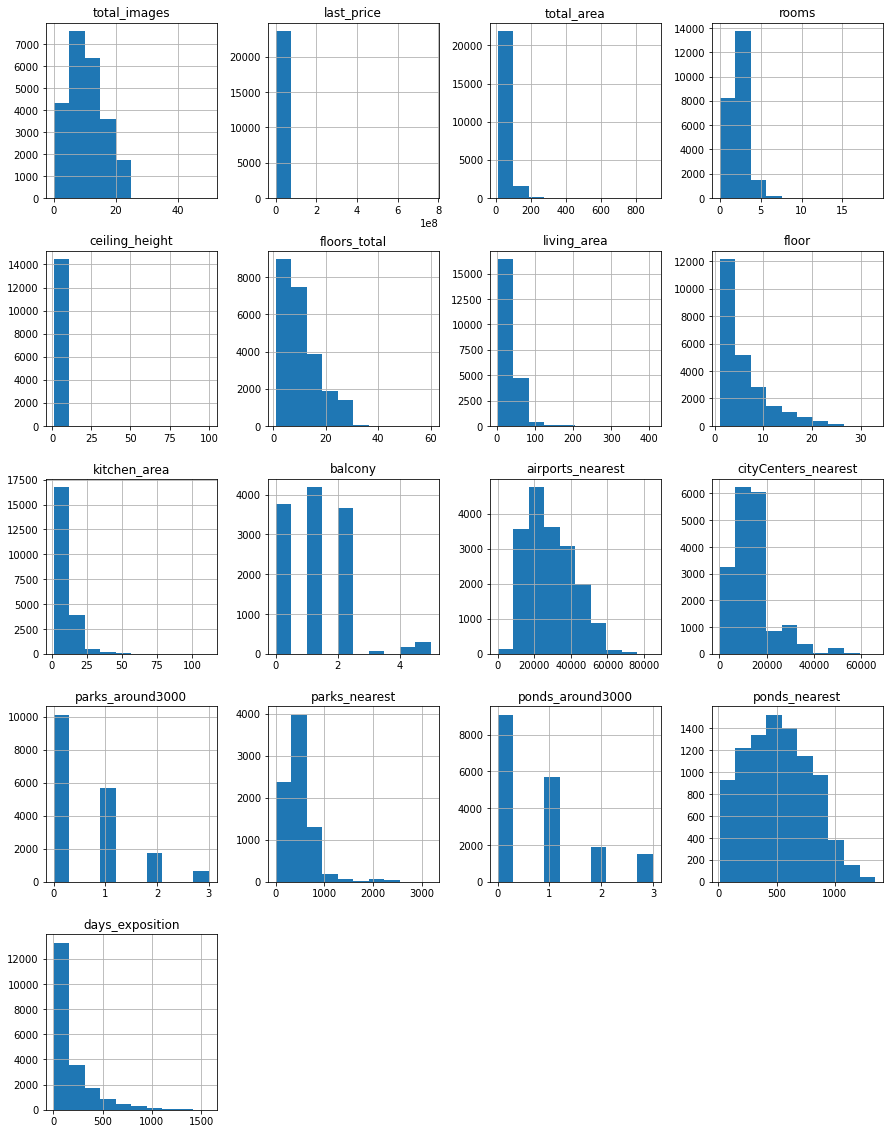

In [5]:
df.hist(figsize=(15, 20))
plt.show()

В числовых данных нет отрицательных значений, что уже хорошо. Однако во многих столбцах большой разброс данных и высокое стандартное отклонение.

Рассмотрим данные подробнее.

### Предобработка данных

Проверим, в каких столбцах имеются пропуски.

In [6]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В столбцах **floors_total** и **locality_name** пропусков мало, заполнить их невозможно (в датасете нет данных, на основании которых можно заполнить эти пропуски, например года постройки или координат).
Удалим строки с пропусками в данных столбцах.

In [7]:
df = df.dropna(subset = ['locality_name']).reset_index(drop=True) # удаление строк с пропусками в столбце locality_name

In [8]:
df = df.dropna(subset = ['floors_total']).reset_index(drop=True) # удаление строк с пропусками в столбце floors_total

Довольно много пропусков в стобце **balcony**.
Предположим, что отсутствие значение в столбце **balcony** говорит об отсутствии балконов в квартире.
Заменим эти пропуски на 0.

In [9]:
df['balcony'] = df['balcony'].fillna(0)

Практически одинаковое количество пропусков наблюдается в столбцах:
- airports_nearest
- cityCenters_nearest
- parks_around3000
- ponds_around3000

Можно предположить, что эти данные пропущены для целых населенных пунктов.
Рассмотрим как распределены значения в этих столбцах по населенным пунктам.

In [10]:
display(len(df['locality_name'].unique())) # общее количество уникальных населенных пунктов

364

In [11]:
df.pivot_table(index='locality_name', values=['airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'ponds_around3000'])

,airports_nearest,cityCenters_nearest,parks_around3000,ponds_around3000
locality_name,,,,
Зеленогорск,73300.250000,54617.583333,1.916667,0.875000
Колпино,26375.863501,32113.771513,0.522255,0.997033
Красное Село,26610.028736,30034.741379,0.482759,0.091954
Кронштадт,67469.263158,49195.726316,1.789474,1.936842
Ломоносов,48308.280303,50739.969697,0.242424,1.128788
Павловск,21053.342105,33206.921053,1.552632,1.842105
Петергоф,40184.676617,35468.925373,1.338308,1.308458
Пушкин,16447.869919,28745.375000,0.747967,0.872629
Санкт-Петербург,28040.281621,11588.493939,0.627606,0.770188


Действительно, населенных пунктов 364, а данные по выбранным столбцам заполненные менее чем в 30.

Проделаем то же самое для столбцов **parks_nearest** и **ponds_nearest**.

In [12]:
df.pivot_table(index='locality_name', values=['parks_nearest', 'ponds_nearest'])

,parks_nearest,ponds_nearest
locality_name,,
Зеленогорск,210.625000,485.888889
Колпино,495.481203,532.268421
Красное Село,468.400000,445.500000
Кронштадт,324.574713,343.413793
Ломоносов,389.062500,550.048193
Павловск,379.538462,493.382353
Петергоф,419.559441,513.367521
Пушкин,404.297170,482.988701
Санкт-Петербург,498.338298,520.391129


Здесь ситуация еще хуже. Информация о ближайших парках есть только по 12 населенным пунктам, о ближайших водоемах - по 18.

Картографические данные по большинству населенных пунктов отсутствуют. Это может быть связано с тем, что в некоторых населенных пунктах отсутствуют аэропорты, парки, водоемы, а также центр города.

Рассмотрим распределение значений в столбце is_apartment.

In [13]:
df['is_apartment'].value_counts()

False    2710
True       50
Name: is_apartment, dtype: int64

Строк, в которых **is_apartment** принимает значение True совсем мало. Взглянем на них подробнее.

In [14]:
df.query('is_apartment == True')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
540,11,12790000.0,56.60,2018-11-06T00:00:00,2,3.50,3.0,29.400000,1,True,...,NaN,0.0,Петергоф,35248.0,30437.0,3.0,53.0,3.0,22.0,NaN
912,11,8183000.0,70.00,2018-01-11T00:00:00,2,3.12,3.0,40.000000,3,True,...,NaN,2.0,Санкт-Петербург,45796.0,21729.0,0.0,NaN,1.0,754.0,179.0
1104,1,34878556.0,95.80,2014-12-09T00:00:00,2,NaN,6.0,58.300000,5,True,...,20.00,1.0,Санкт-Петербург,21860.0,318.0,2.0,160.0,3.0,569.0,1572.0
1603,12,2150000.0,20.10,2019-01-30T00:00:00,1,NaN,9.0,NaN,1,True,...,NaN,0.0,Санкт-Петербург,26646.0,12147.0,0.0,NaN,0.0,NaN,13.0
2748,11,7500000.0,152.00,2018-07-27T00:00:00,3,3.00,3.0,NaN,1,True,...,NaN,1.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,7.0
2962,9,4931398.0,42.90,2018-07-23T00:00:00,1,3.15,4.0,20.390000,3,True,...,10.29,0.0,Санкт-Петербург,44870.0,20802.0,0.0,NaN,1.0,792.0,273.0
3053,13,6600000.0,95.00,2018-09-08T00:00:00,2,4.50,7.0,45.000000,7,True,...,25.00,2.0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,96.0
3800,4,4779000.0,53.10,2016-05-16T00:00:00,1,NaN,13.0,19.800000,6,True,...,15.90,2.0,Санкт-Петербург,19396.0,4516.0,0.0,NaN,1.0,826.0,60.0
3933,10,4300000.0,50.00,2019-04-20T00:00:00,1,3.00,11.0,17.000000,9,True,...,12.00,2.0,Санкт-Петербург,10143.0,11367.0,0.0,NaN,0.0,NaN,NaN
4318,19,6900000.0,72.00,2019-03-25T00:00:00,3,3.50,4.0,70.000000,1,True,...,NaN,0.0,Санкт-Петербург,31487.0,4466.0,2.0,353.0,1.0,439.0,22.0


В данных отсутствует какие-либо закономерности для строк со значением True  в столбце is_apartment. Оставим пропуски в этом столбце без изменений.

Много пропусков имеется в столбцах **living_area** и **kitchen_area**.

Посмотрим, возможно ли их запонить медианой в зависимости от общего количества комнат.

In [15]:
df.groupby('rooms')['living_area'].describe()

,count,mean,std,min,25%,50%,75%,max
rooms,,,,,,,,
0,183.0,18.865246,6.549527,2.0,16.000,18.000,19.950,68.0
1,7358.0,17.899507,3.444951,3.0,16.000,17.600,19.000,60.0
2,7265.0,31.731865,6.121858,2.0,28.100,30.500,33.900,99.5
3,5339.0,47.374108,11.213742,3.0,41.000,45.000,51.300,170.8
4,1082.0,66.994806,23.349625,5.4,52.000,63.650,76.375,250.0
5,292.0,100.009247,36.644486,23.6,76.475,91.785,116.425,301.5
6,98.0,131.799796,42.180914,68.0,101.575,124.400,158.500,300.0
7,53.0,163.564151,68.203364,57.4,119.300,145.000,193.000,347.5
8,12.0,168.683333,41.550623,107.0,152.400,161.000,179.200,260.0


In [16]:
df.groupby('rooms')['kitchen_area'].describe()

,count,mean,std,min,25%,50%,75%,max
rooms,,,,,,,,
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7195.0,9.544076,3.291325,1.3,7.200,9.00,11.000,58.4
2,7257.0,9.970915,5.111211,2.0,7.000,8.70,11.300,93.0
3,5356.0,11.292920,6.906926,4.0,7.000,9.50,13.000,107.0
4,1075.0,13.672140,8.955718,4.8,8.000,11.00,15.950,77.0
5,285.0,18.367649,10.862392,5.0,11.400,15.10,20.700,66.0
6,96.0,21.098229,9.892416,5.9,14.300,19.75,26.625,56.0
7,52.0,21.998077,12.114802,5.0,15.775,20.00,25.000,70.0
8,9.0,24.866667,13.085106,5.0,22.600,25.00,29.400,45.0


Стандартное отклонение в обоих случаях достаточно высокое по большинству значений столбца **rooms**.
Оставим пропуски в столбцах **living_area** и **kitchen_area** без изменений.

Также у нас остались пропуски в столбцах:

- ceiling_height
- days_exposition

Количетво дней, которое висело объявление до момента продажи, нам также нечем заполнить.
Пропуски в столбце **ceiling_height** пока оставим и изучим значения в каждом столбце отдельно.

Рассмотрим типы данных в каждом столбце.

В столбце **first_day_exposition** изменим тип данных с object на datetime.

Также изменим тип данных с float64 на int64 в столбцах **floors_total** и **balcony**, т.к. в данных столбцах могут быть только целочисленные значения.

In [17]:
# меняем тип данных в столбце first_day_exposition на формат дата-время
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [18]:
df['floors_total'] = df['floors_total'].astype('int') # меняем тип данных на целочисленный в столбце floors_total

In [19]:
df['balcony'] = df['balcony'].astype('int') # меняем тип данных на целочисленный в столбце balcony

Приведение даты к соответствующему формату необходимо для дальнейшей работы с данными в этом столбце.

Общее количество этажей и балконов можно было оставить без изменения формата, однако, т.к. эти величины не могут быть значениями с плавающей запятой, корректнее все-таки изменить формат.

Теперь рассмотрим уникальные значения столбца locality_name.

In [20]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

В данных вариантов написания слова "поселок".  Приведем все поселки к единому виду.

In [21]:
df['locality_name'] = df['locality_name'].str.replace('посёлок', 'поселок')
df['locality_name'] = df['locality_name'].str.replace('городской поселок', 'поселок')
df['locality_name'] = df['locality_name'].str.replace('поселок городского типа', 'поселок')
df['locality_name'] = df['locality_name'].str.replace('коттеджный поселок', 'поселок')
df['locality_name'] = df['locality_name'].str.replace('поселок при железнодорожной станции', 'поселок')
df['locality_name'] = df['locality_name'].str.replace('поселок станции', 'поселок')

Также более подробно рассмотрим значения некоторых столбцов.

**1. Цена продажи**

Максимальная цена на квартиру может быть любой. Посмотрим на самые низкие значения.

In [22]:
df['last_price'].sort_values().head()

8750      12190.0
17359    430000.0
14825    430000.0
16185    440000.0
9535     450000.0
Name: last_price, dtype: float64

Маловероятно, что стоимость квартиры составляет 12 190 руб. Исключим это значение.

In [23]:
df = df.query('last_price > 400000')

**2. Общая площадь**

Рассмотрим минимальные и максимальные значения

In [24]:
df['total_area'].sort_values().head()

19795    12.0
19437    13.0
17859    13.0
19698    13.0
19449    13.2
Name: total_area, dtype: float64

In [25]:
df['total_area'].sort_values().tail()

5330     590.0
15565    618.0
3103     631.0
12787    631.2
19431    900.0
Name: total_area, dtype: float64

Поиск в интернете подсказывает, что настолько большие и настолько маленькие квартиры действительно существуют. Оставим эти данные без изменений.

**3. Количество комнат**

Рассмотрим уникальные значения в столбце **rooms**.

In [26]:
df['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

Значение 0 бросается в глаза. Проверим, возможно это студии или квартиры с открытой планировкой.

In [27]:
df.query('rooms == 0 and open_plan == False and studio == False')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Нет таких квартир, в которых 0 комнат, и они не являются либо студией, либо квартирой с открытой планировкой.
Значит, нули оставляем.

**4. Этажность дома**

Рассмотрим уникальные значения столбца **floors_total**.

In [28]:
df['floors_total'].unique()

array([16, 11,  5, 14, 12, 26, 24, 27,  9,  6, 17, 25,  3, 23, 19, 18,  4,
       22,  8,  2, 10,  7, 13, 15, 20, 28, 36, 21, 35, 34, 60,  1, 29, 33,
       52, 37])

Беглый поиск в сети подсказывает, что в самом высоком жилом здании в СПб и Лен.области всего 37 этажей. Исключим строки, которые не соответствуют этим данным.

In [29]:
df = df.query('floors_total <= 37')

Минимальные значения в столбцах **living_area** и **kitchen_area** рассматривать не будем, т.к. в студиях и квартирах с открытой планировкой нет четкого разделения на жилую зону и зону кухни, поэтому в таких объявлениях могут быть произвольные значения в данных столбцах.

**5. Этаж**

Проверим, что в датасете нет объявлений, в которых значение этажа больше этажности дома.

In [30]:
df.query('floor > floors_total')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Таких строк нет, с этажами все в порядке.

**6. Жилая площадь и площадь кухни**

Также проверим, что в датасете нет строк в которых жилая площадь и плозадь кухни суммарно превышают общую площадь.

In [31]:
df.query('(living_area + kitchen_area) > total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
184,7,2600000.0,30.20,2018-02-14,1,2.65,9,26.10,5,NaN,...,6.20,0,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0
542,9,4700000.0,23.80,2018-12-28,1,NaN,18,20.00,9,NaN,...,5.00,0,Санкт-Петербург,9731.0,11849.0,0.0,NaN,0.0,NaN,108.0
548,8,3100000.0,31.59,2018-03-08,1,2.70,19,30.55,2,NaN,...,9.28,2,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,70.0
598,12,5600000.0,53.70,2017-04-18,2,2.50,12,48.30,5,NaN,...,7.00,2,Санкт-Петербург,50477.0,13252.0,2.0,220.0,1.0,1250.0,167.0
692,1,3364930.0,34.69,2014-11-27,1,2.64,25,23.43,25,NaN,...,23.43,2,Санкт-Петербург,43396.0,12153.0,0.0,NaN,0.0,NaN,574.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21700,20,2450000.0,44.00,2019-02-12,2,27.00,2,38.00,2,False,...,8.60,2,поселок Большая Ижора,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21744,12,2600000.0,34.30,2018-09-26,1,2.50,9,30.60,6,NaN,...,8.00,2,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,107.0
21790,14,11990000.0,91.40,2016-05-16,2,NaN,16,62.00,12,NaN,...,32.40,0,Санкт-Петербург,10934.0,12551.0,0.0,NaN,0.0,NaN,93.0
21831,0,5200000.0,46.00,2018-07-20,2,NaN,5,44.00,5,NaN,...,8.00,1,Санкт-Петербург,14103.0,15182.0,1.0,488.0,0.0,NaN,7.0


А вот тут уже явные ошибки в данных. Исключим эти строки.

In [32]:
df = df.query('not (living_area + kitchen_area) > total_area')

**7. Высота потолков**

Рассмотрим уникальные значения в этом столбце

In [33]:
df['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
        32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,
      

Вероятно, в значениях больше 20 м некорректно поставлен разделитель.
Создадим функцию, которая уменьшит такие значения в 10 раз.

In [34]:
def new_ceiling_height(ceiling_height):
    try:
        if ceiling_height >= 20:
            return ceiling_height / 10
        return ceiling_height
    except:
        pass

In [35]:
df['ceiling_height'] = df['ceiling_height'].apply(new_ceiling_height)

Теперь проверим, сможем ли мы заполнить высоту потолков медианой в зависимости от этажности здания.

In [36]:
df.groupby('floors_total')['ceiling_height'].median()

floors_total
1     2.80
2     2.70
3     2.80
4     3.00
5     2.55
6     3.00
7     3.00
8     2.80
9     2.55
10    2.60
11    2.75
12    2.65
13    2.70
14    2.60
15    2.70
16    2.70
17    2.70
18    2.70
19    2.75
20    2.75
21    2.70
22    2.75
23    2.75
24    2.75
25    2.75
26    2.66
27    2.70
28    2.60
29    2.60
33     NaN
34    2.65
35    2.70
36    2.70
37    1.75
Name: ceiling_height, dtype: float64

Сможем для любого количества этажей, кроме 33. Удалим такие строки и заполним высоту потолков медианой.

In [37]:
df = df.query('floors_total != 33')

In [ ]:
try:
    df['ceiling_height'] = df.groupby('floors_total')['ceiling_height'].apply(lambda x: x.fillna(x.median()))
except:
    pass

Также, неправдоподобно выглядит высота потолков менее 2-х метров. Вряд ли существуют такие квартиры. Удалим такие значения.

In [39]:
df = df.query('ceiling_height >= 2')

Таким образом, мы исключили строки, в которых:
- неправдоподобно низкая цена
- слишком большое количество этажей, т.к. таких домов не существует в СПб и Лен.области
- жилая площадь и площадь кухни суммарно превышают общую площадь
- высота потолков менее 2-х метров

### Добавление в таблицу новых столбцов

In [40]:
df['one_meter_price'] = df['last_price'] / df['total_area'] # цена за один квадратный метр

In [41]:
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday # день недели, в который было выставлено объявление

In [42]:
df['month_exposition'] = df['first_day_exposition'].dt.month # месяц, в который было выставлено объявление

In [43]:
df['year_exposition'] = df['first_day_exposition'].dt.year # гор, в который было выставлено объявление

In [44]:
# создадим функцию, которая определит этаж к одной из 3-х категорий
def floor_type(row):
    floor = row['floor']
    floors_total = row['floors_total']
    try:
        if floor == 1:
            return 'Первый'
        elif floor == floors_total:
            return 'Последний'
        else:
            return 'Другой'
    except:
        return 'Нет данных'

In [45]:
df['floor_type'] = df.apply(floor_type, axis=1) # создадим новый столбец с типом этажа

In [46]:
df['cityCenters_nearest_km'] = df['cityCenters_nearest'] // 1000 # расстояние до центра города в километрах

### Исследовательский анализ данных

Построим гистограмму по столбцу **total_area**.

count    23494.000000
mean        60.353713
std         35.690325
min         12.000000
25%         40.000000
50%         52.000000
75%         69.707500
max        900.000000
Name: total_area, dtype: float64

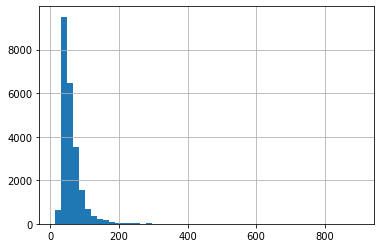

In [47]:
df['total_area'].hist(bins=50) # гистограмма всех значений
df['total_area'].describe()

На графике видно, что большинство квартир по площади не превышают 150 кв.м. Создадим новый датафрейм, в который включим только квартиры до 150 кв.м. и посмотрим, как в нем распределены значения.

In [48]:
df_good = df.query('total_area < 150')

count    22915.000000
mean        56.469996
std         22.797799
min         12.000000
25%         40.000000
50%         51.000000
75%         67.600000
max        149.600000
Name: total_area, dtype: float64

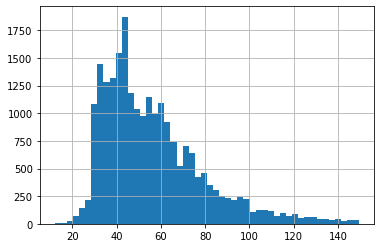

In [49]:
df_good['total_area'].hist(bins=50) # гистограмма всех значений
df_good['total_area'].describe()

<AxesSubplot:>

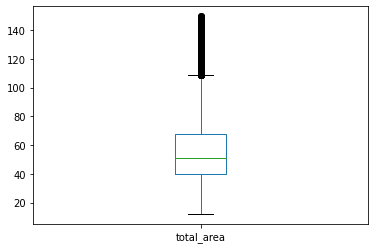

In [50]:
df_good['total_area'].plot(kind='box')

Гистограмма стала ближе к нормальному распределению, разброс значений сократился. В дальнейшем анализе будем рассматривать **df_good**, т.к. квартиры более 150 кв.м. встречаются редко и могут влиять на распределение значений в данных.

Теперь более подробно рассмотри столбцы **living_area** и **kitchen_area**.

<AxesSubplot:>

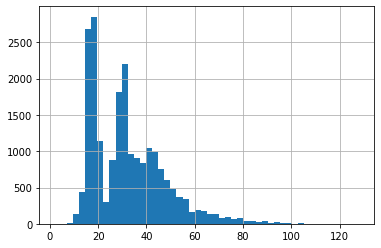

In [51]:
df_good['living_area'].hist(bins=50)

На графике по столбцу **living_area** наблюдается несколько пиков и провалов, что может говорить о проблемах в данных.

Однако также можно предположить, что в датасете преобладающую часть объявлений составляют квартиры в типовых домах, а одинаковые данные по таким квартирам образуют пики на графиках.

<AxesSubplot:>

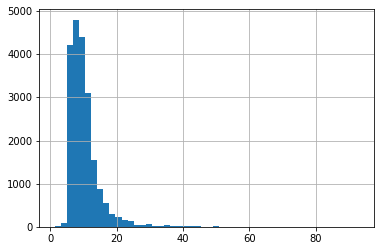

In [52]:
df_good['kitchen_area'].hist(bins=50)

В преобладающем большинстве квартир площадь кухни не превышает 25 кв.м.

Исключим из df_good квартиры с жилой площадью более 100 кв.м. и площадью кухни более 40 кв.м. Таким образом, мы также исключим пропусщенные значения для дальнейшего анализа.

In [53]:
df_good = df_good.query('living_area < 100 and kitchen_area < 40')

Теперь рассмотрим цены объектов.

<AxesSubplot:>

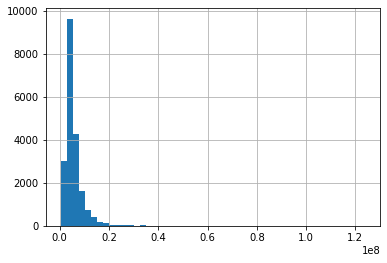

In [54]:
df_good['last_price'].hist(bins=50)

На гистограмме виден пик в самом начале в диапазоне между 0 и 20 млн. Дальше значений практически нет. Построим вторую гистограмму по квартирам дешевле 20 млн.руб. и посчитаем сколько в датасете более дорогих квартир.

(245, 28)

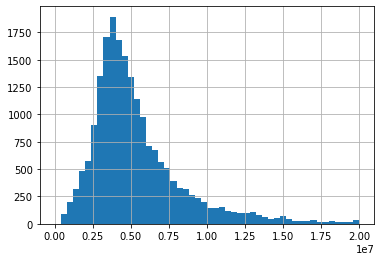

In [55]:
df_good['last_price'].hist(bins=50, range=(0, 20000000))
df_good.query('last_price > 20000000').shape

На второй гистограмме мы видим практически нормальное распределение, чего нельзя сказать о первой. Исключим квартиры дороже 20 млн.руб., так как их немного.

In [56]:
df_good = df_good.query('last_price < 20000000')

Посмотрим на распределение значений по количеству комнат.

<AxesSubplot:>

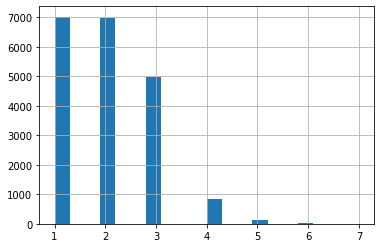

In [57]:
df_good['rooms'].hist(bins=20)

Большая часть объявлений - 1, 2 и 3-комнатные квартиры. Вполне соответствует действительности.

Теперь посмотрим на высоту потолков.

<AxesSubplot:>

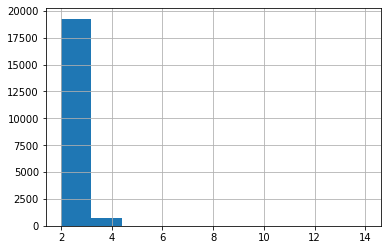

In [58]:
df_good['ceiling_height'].hist(bins=10)

Все_таки потолки более 5 метров - большая редкость. Исключим их из анализа и снова построим гистограмму.

In [59]:
df_good = df_good.query('ceiling_height < 5')

<AxesSubplot:>

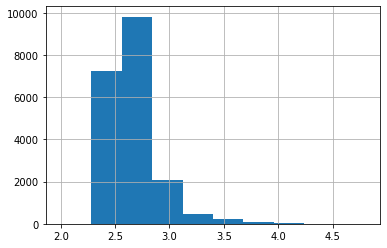

In [60]:
df_good['ceiling_height'].hist(bins=10)

Теперь данные выглядят более реалистично.

Теперь рассмотрим на каких этажах размещены наши квартиры.

<AxesSubplot:>

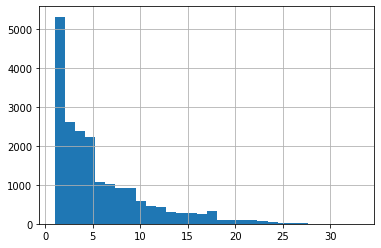

In [61]:
df_good['floor'].hist(bins=30)

Очень много квартир на 2-м этаже. Также рассмотрим, как распределены категории этажей (первый, последний и другой).

<AxesSubplot:>

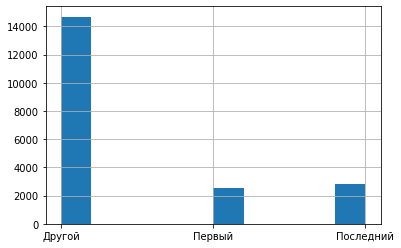

In [62]:
df_good['floor_type'].hist()

Большинство квартир не на первом и не на последнем этаже. Тоже вполне похоже на правду.

Построим гистограмму по общей этажности зданий, в которых продаются квартиры.

<AxesSubplot:>

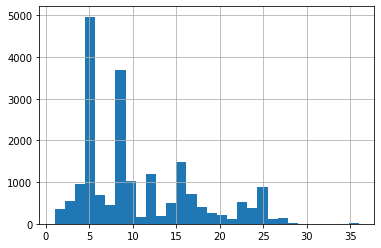

In [63]:
df_good['floors_total'].hist(bins=30)

Очень много квартир в 5 и 9-этажных домах. Предположение про типовую застройку было верным.

Посмотрим, насколько близко наши квартиры расположены к центру города, паркам и аэропортам.

<AxesSubplot:>

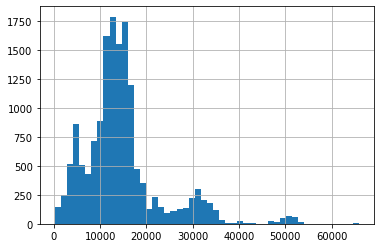

In [64]:
df_good['cityCenters_nearest'].hist(bins=50)

Большинство квартир расположены в 10-20 км от центра города,

<AxesSubplot:>

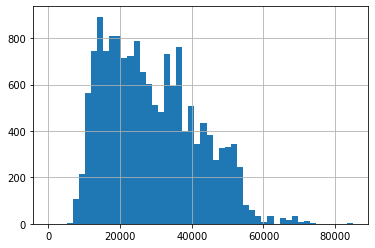

In [65]:
df_good['airports_nearest'].hist(bins=50)

Удаленность от аэропорта в объявлениях варьируется примерно от 10 до 55 км.

<AxesSubplot:>

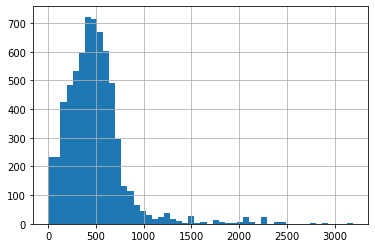

In [66]:
df_good['parks_nearest'].hist(bins=50)

Удаленность от парка в большинстве случаев составляет не более 1 км.

Теперь рассмотрим в какие дни и месяцы чаще выставляются объявления.

<AxesSubplot:>

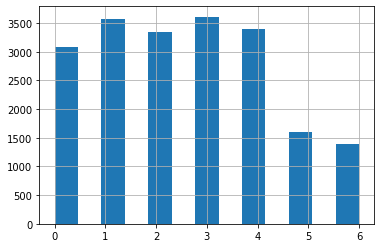

In [67]:
df_good['weekday_exposition'].hist(bins=13)

В выходные размещается меньше объявлений, чем в будни.

<AxesSubplot:>

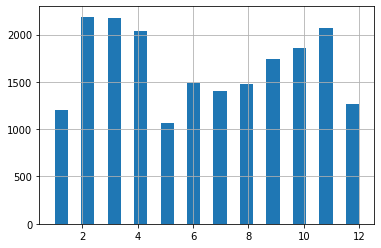

In [68]:
df_good['month_exposition'].hist(bins=23)

Весной и осенью размещается больше объявлений, чем зимой (декабрь-январь) и летом (все месяцы + май). Вероятно, это обусловлено тем, что летом и на январские праздники многие люди уезжают отдыхать.

Также посмотрим как быстро обычно продаются квартиры.

<AxesSubplot:>

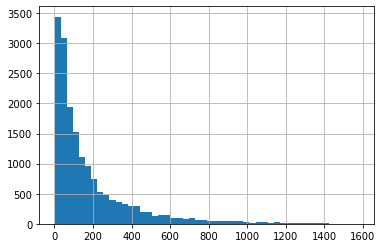

In [69]:
df_good['days_exposition'].hist(bins=50)

In [70]:
df_good['days_exposition'].describe()

count    17333.000000
mean       181.512491
std        218.001090
min          1.000000
25%         44.000000
50%         99.000000
75%        233.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

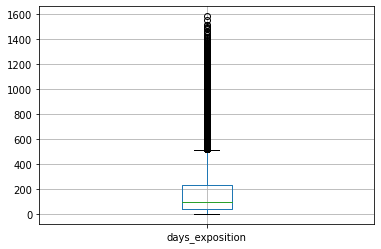

In [71]:
df_good['days_exposition'].plot(kind='box', grid=True)

Большинство квартир продаются в диапазоне от 1 до 500 дней, все что продается дольше - на диаграмме размаха оценивается как выбросы. Продажи за 1 день кажутся очень быстрыми, но в целом это вполне реально.

Примечательно, что среднее превышает медиану почти в 2 раза. Значит выбросов (или чересчур долгих продаж) в данных действительно много.

Теперь рассмотрим, какие факторы оказывают влияние на цену объектов.

0.7575407007581063

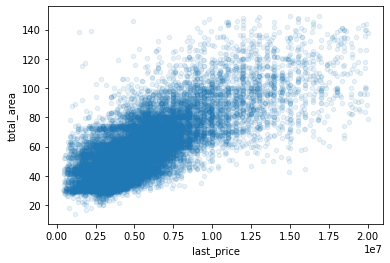

In [72]:
df_good.plot(x='last_price', y='total_area', kind='scatter', alpha=0.1)
df_good['last_price'].corr(df_good['total_area'])

0.75 - довольно высокий коэффициент коррекляции. Цена объекта практически напрямую зависит от ее площади.

0.6332909090064298

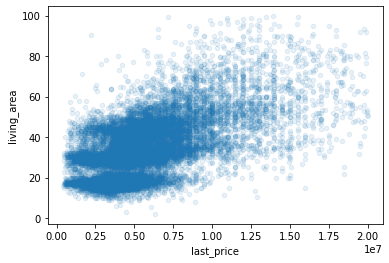

In [73]:
df_good.plot(x='last_price', y='living_area', kind='scatter', alpha=0.1)
df_good['last_price'].corr(df_good['living_area'])

Жилая площадь влияет на цену меньше, но определенная линейная зависимость все же присутствует.

0.560488605477706

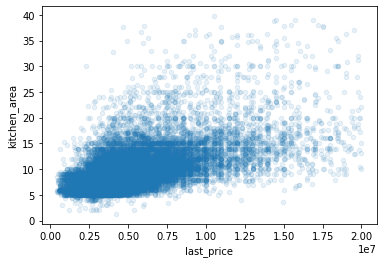

In [74]:
df_good.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.1)
df_good['last_price'].corr(df_good['kitchen_area'])

Влияние на цену площади кухни еще меньше. Все-таки большинство кухонь имеют стандартный размер вне зависимости от площади квартиры, поэтому с ценой корреляции почти нет.

0.4742123461048969

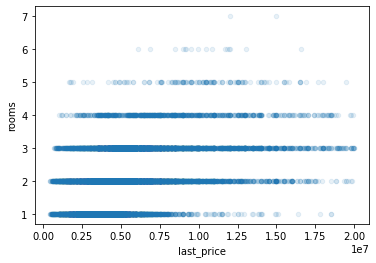

In [75]:
df_good.plot(x='last_price', y='rooms', kind='scatter', alpha=0.1)
df_good['last_price'].corr(df_good['rooms'])

Также невысокая корреляция наблюдается между стоимостью и количеством комнат. При этом определенная зависимость для квартир не более чем с 3 комнатами все же наблюдается.

0.11442216393993467

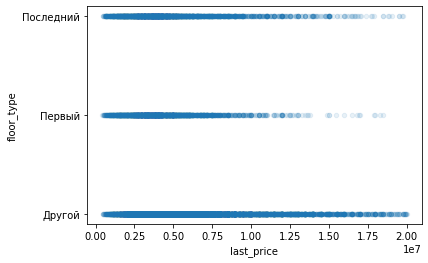

In [76]:
df_good.plot(x='last_price', y='floor_type', kind='scatter', alpha=0.1)
df_good['last_price'].corr(df_good['floor'])

Стоимость объекта вообще не зависит от этажа.

-0.01242434194070976

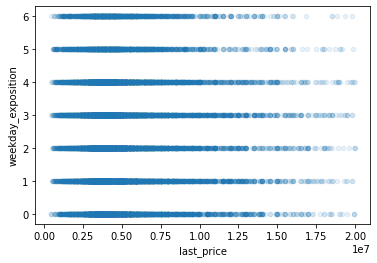

In [77]:
df_good.plot(x='last_price', y='weekday_exposition', kind='scatter', alpha=0.1)
df_good['last_price'].corr(df_good['weekday_exposition'])

Также отсутствует зависимость цены от дня недели, когда было выставлено объявление.

0.0072928934202746805

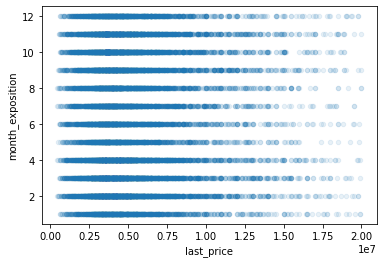

In [78]:
df_good.plot(x='last_price', y='month_exposition', kind='scatter', alpha=0.1)
df_good['last_price'].corr(df_good['month_exposition'])

Связь между стоимостью и месяцем выставления отсутствует.

-0.013172547722045694

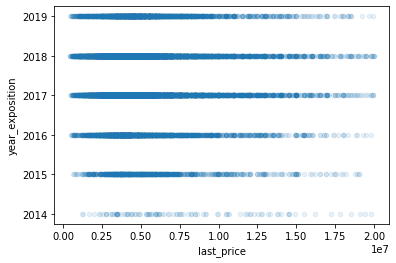

In [79]:
df_good.plot(x='last_price', y='year_exposition', kind='scatter', alpha=0.1)
df_good['last_price'].corr(df_good['year_exposition'])

Связь между ценой и годом, когда было выставлено объявление тоже отсутствует.

Таким образом, наибольшее влияние на стоимость квартиры оказывает общая площадь. Меньшее влияние оказывает жилая площадь, еще меньшее - площадь кухни и количество комнат.

Теперь рассмотри 10 наиболее популярных локаций в зависимости от количества объявлений. Данные сохраним в переменной popular_locality.

In [90]:
popular_locality = df.pivot_table(index='locality_name', values='one_meter_price', aggfunc=['count', 'mean'])
popular_locality.columns = ['count', 'mean']
popular_locality.sort_values(by='mean', ascending=False).head(10)

,count,mean
locality_name,,
Зеленогорск,24,115122.799198
Санкт-Петербург,15607,114857.721601
поселок Репино,4,104238.614786
Пушкин,369,103125.819291
Сестрорецк,182,101694.014038
поселок Лисий Нос,3,100660.814239
Кудрово,171,100134.543715
деревня Мистолово,11,98549.976709
поселок Левашово,1,96997.690531


Cреди популярных локаций самые дорогие квартиры в Зеленогорске и Санкт-Петербурге, самые дешевые - в Мурино, Левашово и Мистолово.

Теперь рассмотрим влияние удаления от центра на стоимость квартир в Санкт-Петербурге. Выделим квартиры в Санкт-Петербургу в переменную spb_ads.

In [81]:
spb_ads = df_good.query('locality_name == "Санкт-Петербург"')

Посмотрим, есть ли критичные для нас пропуски.

In [82]:
spb_ads.isna().sum()

total_images                  0
last_price                    0
total_area                    0
first_day_exposition          0
rooms                         0
ceiling_height                0
floors_total                  0
living_area                   0
floor                         0
is_apartment              11585
studio                        0
open_plan                     0
kitchen_area                  0
balcony                       0
locality_name                 0
airports_nearest             51
cityCenters_nearest          34
parks_around3000             34
parks_nearest              7248
ponds_around3000             34
ponds_nearest              6734
days_exposition            1655
one_meter_price               0
weekday_exposition            0
month_exposition              0
year_exposition               0
floor_type                    0
cityCenters_nearest_km       34
dtype: int64

Нам необходимо удалить пропуски из столбца **cityCenters_nearest_km** для дальнейших расчетов.

In [83]:
spb_ads = spb_ads.dropna(subset = ['cityCenters_nearest_km']).reset_index(drop=True)

In [84]:
spb_ads['cityCenters_nearest_km'].corr(spb_ads['last_price'])

-0.3952355278822654

In [85]:
spb_ads.pivot_table(index='cityCenters_nearest_km', values='last_price')

,last_price
cityCenters_nearest_km,
0.0,9.816521e+06
1.0,1.007807e+07
2.0,9.174247e+06
3.0,8.669389e+06
4.0,9.184911e+06
5.0,8.476741e+06
6.0,7.867893e+06
7.0,8.019896e+06
8.0,7.161501e+06


Из полученных данных можно увидить, что стоимость квартиры постепенно снижается по мере удаления от центра города. Исключение составляют квартиры на удалении 27 км от центра. Возможно, это выбросы в данных. Также может быть, что на таком удалении от центра города есть предложения только дорогих квартир (повышенного класса комфортности или с большой площадью).

При этом коэффициент корреляции не показывает четкой зависимости этих двух параметров.

### Общий вывод

Анализ датафрейма позволил узнать следующее:
1. самое большое влияние на стоимость квартиры оказывает ее площадь, меньшее влияние - жилая площадь и площадь кухни, а также количество комнат
2. из топ-10 локаций с наибольшим количеством объявлений самые дорогие квартиры - в Зеленогорске и Санкт-Петербурге, самые дешевые - в Мурино, Левашово и Мистолово
3. в Санкт-Петербурге стоимость квартир в целом увеличивается по мере приближения к центру города
4. для большинства населенных пунктов пропущены данные по количетву парков и водоемов, а также по расстоянию до ближайших аэропортов, парков, водоемов и до центра города